# Introução

Para essa aplicação foi utilizado dados conforme: 

* A partir de 2017; 
* Todas as Operadoras; 
* Não foi considerado as avaliações condicionais, por exemplo, caso tenha cancelado e a avaliaçãod e cancelamento. Nesse caso, todas as colunas de avaliação foram removidas, e mantiada a de sim ou não;
* \>= 6 São satisfeitos e <6 Insatisfeitos;

In [12]:
import pandas as pd
from pandas_ods_reader import read_ods
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import skopt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score

dados= pd.read_csv(r"C:\Users\Usuario\Matheus\Dissetação\Anatel\machine-learning-anatel-database\raw_data\Anatel.csv")

linhas= dados.index
colunas= dados.columns

Data_Filter = dados.copy()

Data_Filter = Data_Filter[ dados["ANO_BASE"] > 2016]
#Data_Filter = Data_Filter[ dados["OPERADORA"] == "VIVO"]


Data_Filter["ESTADO"] = Data_Filter["ESTADO"].astype('category').cat.codes
Data_Filter["OPERADORA"] = Data_Filter["OPERADORA"].astype('category').cat.codes
Data_Filter.drop("Q2", inplace= True, axis = 1)
Data_Filter.drop("Q2_1", inplace= True, axis = 1)
Data_Filter.drop("Q2_2", inplace= True, axis = 1)
Data_Filter.drop("Q3", inplace= True, axis = 1)
Data_Filter.drop("Q4", inplace= True, axis = 1)
Data_Filter.drop("Q7a", inplace= True, axis = 1)
Data_Filter.drop("A2_1", inplace= True, axis = 1)
Data_Filter.drop("A2_2", inplace= True, axis = 1)
Data_Filter.drop("A2_3", inplace= True, axis = 1)
Data_Filter.drop("A1_4", inplace= True, axis = 1)
Data_Filter.drop("A3", inplace= True, axis = 1)
Data_Filter.drop("A4", inplace= True, axis = 1)
Data_Filter.drop("IDTNS", inplace= True, axis = 1)
Data_Filter.drop("G1", inplace= True, axis = 1)
Data_Filter.drop("G2_1", inplace= True, axis = 1)
Data_Filter.drop("G2_2", inplace= True, axis = 1)
Data_Filter.drop("G2_3", inplace= True, axis = 1)
Data_Filter.drop("E2", inplace= True, axis = 1)
Data_Filter.drop("E4", inplace= True, axis = 1)
Data_Filter.drop("E6", inplace= True, axis = 1)
Data_Filter.drop("E8", inplace= True, axis = 1)
Data_Filter.drop("F2_1", inplace= True, axis = 1)
Data_Filter.drop("F2_2", inplace= True, axis = 1)
Data_Filter.drop("F2_3", inplace= True, axis = 1)
Data_Filter.drop("F4_1", inplace= True, axis = 1)
Data_Filter.drop("F4_2", inplace= True, axis = 1)
Data_Filter.drop("F4_3", inplace= True, axis = 1)
Data_Filter.drop("I1", inplace= True, axis = 1)
Data_Filter.drop("PESO", inplace= True, axis = 1)
Data_Filter.drop("Q1", inplace= True, axis = 1)
Data_Filter.drop("Q6", inplace= True, axis = 1)
Data_Filter.drop("H3", inplace= True, axis = 1)
Data_Filter.drop("COD_IBGE", inplace= True, axis = 1)
Data_Filter.drop("H2a", inplace= True, axis = 1)
Data_Filter.drop("I2", inplace= True, axis = 1)
Data_Filter.drop("TIPO", inplace= True, axis = 1)
Data_Filter.drop("DATA", inplace= True, axis = 1)
Data_Filter.drop("H0", inplace= True, axis = 1)





Data_Filter["A1_2"] = Data_Filter["A1_2"].replace(2,1)
Data_Filter["A1_3"] = Data_Filter["A1_3"].replace(3,1)
Data_Filter["A1_2"] = Data_Filter["A1_2"].fillna(0)
Data_Filter["A1_3"] = Data_Filter["A1_3"].fillna(0)
Data_Filter["A1_1"] = Data_Filter["A1_1"].fillna(0)

Data_Filter["E1"] = Data_Filter["E1"].replace(2,0)
Data_Filter["E3"] = Data_Filter["E3"].replace(2,0)
Data_Filter["E5"] = Data_Filter["E5"].replace(2,0)
Data_Filter["E7"] = Data_Filter["E7"].replace(2,0)
Data_Filter["F1"] = Data_Filter["F1"].replace(2,0)
Data_Filter["F3"] = Data_Filter["F3"].replace(2,0)


Data_Filter = Data_Filter[Data_Filter.J1 != 99]
Data_Filter = Data_Filter[Data_Filter.B1_1 != 99]
Data_Filter = Data_Filter[Data_Filter.B1_2 != 99]
Data_Filter = Data_Filter[Data_Filter.C1_1 != 99]
Data_Filter = Data_Filter[Data_Filter.C1_2 != 99]
Data_Filter = Data_Filter[Data_Filter.C1_3 != 99]
Data_Filter = Data_Filter[Data_Filter.D1_1 != 99]
Data_Filter = Data_Filter[Data_Filter.D1_2 != 99]
Data_Filter = Data_Filter[Data_Filter.H1 != 99]


Data_Filter.loc[Data_Filter.J1 >= 6, "J1"] = "SATISFEITO"
Data_Filter.loc[Data_Filter.J1 != "SATISFEITO", "J1"] = "INSATISFEITO"

Data_Filter["J1"] = Data_Filter["J1"].replace("SATISFEITO",1)
Data_Filter["J1"] = Data_Filter["J1"].replace("INSATISFEITO",0)


def plot_roc_curve(fpr, tpr, legenda):
    plt.plot(fpr, tpr, linewidth = 2, label = legenda)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.legend()
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")


Data_Filter.info()


C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
Int64Index: 87904 entries, 1 to 91934
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OPERADORA  87904 non-null  int8   
 1   ESTADO     87904 non-null  int8   
 2   ANO_BASE   87904 non-null  int64  
 3   Q5         87904 non-null  int64  
 4   Q7         87904 non-null  int64  
 5   Q8         87904 non-null  int64  
 6   J1         87904 non-null  int64  
 7   B1_1       87904 non-null  int64  
 8   B1_2       87904 non-null  int64  
 9   C1_1       87904 non-null  int64  
 10  C1_2       87904 non-null  int64  
 11  C1_3       87904 non-null  int64  
 12  D1_1       87904 non-null  int64  
 13  D1_2       87904 non-null  int64  
 14  A1_1       87904 non-null  float64
 15  A1_2       87904 non-null  float64
 16  A1_3       87904 non-null  float64
 17  E1         87904 non-null  int64  
 18  E3         87904 non-null  int64  
 19  E5         87904 non-null  float64
 20  E7    

In [13]:
Dados_Y = Data_Filter["J1"].copy()
Dados_X = Data_Filter.copy()
Dados_X.drop("J1", inplace= True, axis = 1)

X_train, X_test, y_train, y_test = train_test_split(Dados_X, Dados_Y, test_size=0.3,random_state=109) # 70% training and 30% test


In [14]:
from sklearn.ensemble import RandomForestClassifier

from bayes_opt import BayesianOptimization

from sklearn.model_selection import cross_val_score

Accuracy: 0.8813135143333839
Precisão: 0.9073279465032043
Recall: 0.9173474561947152
F1Score: 0.9123101921891634
AUC Score: 0.8622455708435017


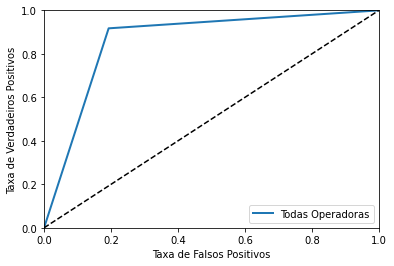

In [15]:
Rand_Forest_Class = RandomForestClassifier()

Rand_Forest_Class.fit(X_train, y_train)

y_pred = Rand_Forest_Class.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cmRF = confusion_matrix(y_test, y_pred)


pRF = precision_score(y_test,y_pred)
rRF = recall_score(y_test,y_pred)
F1RF = f1_score(y_test, y_pred)
print("Precisão:", pRF)
print("Recall:", rRF)
print("F1Score:", F1RF)
fprRF, tprRF, threshold_RF = roc_curve(y_test,y_pred)
plot_roc_curve(fprRF,tprRF, "Todas Operadoras")
aucRF = roc_auc_score(y_test,y_pred)
print("AUC Score:",aucRF)

# Uso do Optimizer

In [16]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {"bootstrap": Categorical([True, False]), # values for boostrap can be either True or False
        "max_depth": Integer(6, 12, 24, 48), # values of max_depth are integers from 6 to 20
        "min_samples_leaf": Integer(2, 4, 8, 16),
        "min_samples_split": Integer(2, 4, 8, 16),
        "n_estimators": Integer(200, 400, 600, 800)
    }

forest_clf = RandomForestClassifier()

forest_bayes_search = BayesSearchCV(forest_clf, search_space, n_iter=10, # specify how many iterations
                                    scoring="roc_auc", n_jobs=-1)

forest_bayes_search.fit(X_train, y_train) 

forest_bayes_search.best_score_

forest_bayes_search.best_estimator_


RandomForestClassifier(max_depth=12, min_samples_leaf=4, min_samples_split=3,
                       n_estimators=380)

Accuracy: 0.8831336265736387
Precisão: 0.9062205727579904
Recall: 0.9217420699757732
F1Score: 0.9139154237193453
AUC Score: 0.8627033439290904


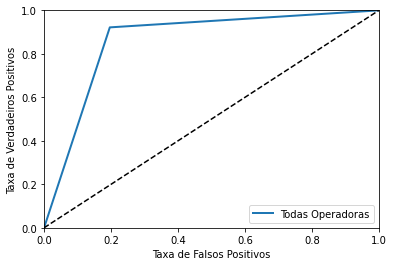

In [19]:
Rand_Forest_Class = forest_bayes_search.best_estimator_

y_pred = Rand_Forest_Class.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cmRF = confusion_matrix(y_test, y_pred)


pRF = precision_score(y_test,y_pred)
rRF = recall_score(y_test,y_pred)
F1RF = f1_score(y_test, y_pred)
print("Precisão:", pRF)
print("Recall:", rRF)
print("F1Score:", F1RF)
fprRF, tprRF, threshold_RF = roc_curve(y_test,y_pred)
plot_roc_curve(fprRF,tprRF, "Todas Operadoras")
aucRF = roc_auc_score(y_test,y_pred,)
print("AUC Score:",aucRF)

# Filtro por Operadoras

In [45]:


Data_Filter_2 = dados.copy()

Data_Filter_2 = Data_Filter_2[ dados["ANO_BASE"] > 2016]
#Data_Filter_2 = Data_Filter_2[ dados["OPERADORA"] == "VIVO"]
Operadoras = Data_Filter_2["OPERADORA"].unique()

Data_Filter_2["ESTADO"] = Data_Filter_2["ESTADO"].astype('category').cat.codes
#Data_Filter_2["OPERADORA"] = Data_Filter_2["OPERADORA"].astype('category').cat.codes
Data_Filter_2.drop("Q2", inplace= True, axis = 1)
Data_Filter_2.drop("Q2_1", inplace= True, axis = 1)
Data_Filter_2.drop("Q2_2", inplace= True, axis = 1)
Data_Filter_2.drop("Q3", inplace= True, axis = 1)
Data_Filter_2.drop("Q4", inplace= True, axis = 1)
Data_Filter_2.drop("Q7a", inplace= True, axis = 1)
Data_Filter_2.drop("A2_1", inplace= True, axis = 1)
Data_Filter_2.drop("A2_2", inplace= True, axis = 1)
Data_Filter_2.drop("A2_3", inplace= True, axis = 1)
Data_Filter_2.drop("A1_4", inplace= True, axis = 1)
Data_Filter_2.drop("A3", inplace= True, axis = 1)
Data_Filter_2.drop("A4", inplace= True, axis = 1)
Data_Filter_2.drop("IDTNS", inplace= True, axis = 1)
Data_Filter_2.drop("G1", inplace= True, axis = 1)
Data_Filter_2.drop("G2_1", inplace= True, axis = 1)
Data_Filter_2.drop("G2_2", inplace= True, axis = 1)
Data_Filter_2.drop("G2_3", inplace= True, axis = 1)
Data_Filter_2.drop("E2", inplace= True, axis = 1)
Data_Filter_2.drop("E4", inplace= True, axis = 1)
Data_Filter_2.drop("E6", inplace= True, axis = 1)
Data_Filter_2.drop("E8", inplace= True, axis = 1)
Data_Filter_2.drop("F2_1", inplace= True, axis = 1)
Data_Filter_2.drop("F2_2", inplace= True, axis = 1)
Data_Filter_2.drop("F2_3", inplace= True, axis = 1)
Data_Filter_2.drop("F4_1", inplace= True, axis = 1)
Data_Filter_2.drop("F4_2", inplace= True, axis = 1)
Data_Filter_2.drop("F4_3", inplace= True, axis = 1)
Data_Filter_2.drop("I1", inplace= True, axis = 1)
Data_Filter_2.drop("PESO", inplace= True, axis = 1)
Data_Filter_2.drop("Q1", inplace= True, axis = 1)
Data_Filter_2.drop("Q6", inplace= True, axis = 1)
Data_Filter_2.drop("H3", inplace= True, axis = 1)
Data_Filter_2.drop("COD_IBGE", inplace= True, axis = 1)
Data_Filter_2.drop("H2a", inplace= True, axis = 1)
Data_Filter_2.drop("I2", inplace= True, axis = 1)
Data_Filter_2.drop("TIPO", inplace= True, axis = 1)
Data_Filter_2.drop("DATA", inplace= True, axis = 1)
Data_Filter_2.drop("H0", inplace= True, axis = 1)





Data_Filter_2["A1_2"] = Data_Filter_2["A1_2"].replace(2,1)
Data_Filter_2["A1_3"] = Data_Filter_2["A1_3"].replace(3,1)
Data_Filter_2["A1_2"] = Data_Filter_2["A1_2"].fillna(2)
Data_Filter_2["A1_3"] = Data_Filter_2["A1_3"].fillna(2)
Data_Filter_2["A1_1"] = Data_Filter_2["A1_1"].fillna(2)

Data_Filter_2.loc[Data_Filter_2.J1 >= 6, "J1"] = "SATISFEITO"
Data_Filter_2.loc[Data_Filter_2.J1 != "SATISFEITO", "J1"] = "INSATISFEITO"

Data_Filter_2["J1"] = Data_Filter_2["J1"].replace("SATISFEITO",1)
Data_Filter_2["J1"] = Data_Filter_2["J1"].replace("INSATISFEITO",0)

<ipython-input-46-b7f637d08312>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Dados_ML = Dados_ML[ dados["OPERADORA"] == i]


_______________________________________

CLARO/NET


Accuracy: 0.8944906444906445
Precisão: 0.9139118457300276
Recall: 0.9444839857651246
F1Score: 0.9289464473223662
AUC Score: 0.8518181007823696
_______________________________________

OI


<ipython-input-46-b7f637d08312>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Dados_ML = Dados_ML[ dados["OPERADORA"] == i]




Accuracy: 0.8656595002905287
Precisão: 0.8867999208391055
Recall: 0.8846989141164857
F1Score: 0.8857481715754102
AUC Score: 0.8615584966062655
_______________________________________

SERCOMTEL


<ipython-input-46-b7f637d08312>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Dados_ML = Dados_ML[ dados["OPERADORA"] == i]




Accuracy: 0.8910256410256411
Precisão: 0.9181818181818182
Recall: 0.926605504587156
F1Score: 0.9223744292237444
AUC Score: 0.8675580714425142
_______________________________________

SKY


<ipython-input-46-b7f637d08312>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Dados_ML = Dados_ML[ dados["OPERADORA"] == i]




Accuracy: 0.8642590286425903
Precisão: 0.8780353200883002
Recall: 0.8809523809523809
F1Score: 0.8794914317302377
AUC Score: 0.8618844408318093
_______________________________________

TIM


<ipython-input-46-b7f637d08312>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Dados_ML = Dados_ML[ dados["OPERADORA"] == i]




Accuracy: 0.9028103044496487
Precisão: 0.9219653179190751
Recall: 0.9565217391304348
F1Score: 0.938925680647535
AUC Score: 0.8338758428272495
_______________________________________

UNIFIQUE


<ipython-input-46-b7f637d08312>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Dados_ML = Dados_ML[ dados["OPERADORA"] == i]




Accuracy: 0.9493670886075949
Precisão: 0.96
Recall: 0.9863013698630136
F1Score: 0.9729729729729729
AUC Score: 0.7431506849315068
_______________________________________

VIVO


<ipython-input-46-b7f637d08312>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Dados_ML = Dados_ML[ dados["OPERADORA"] == i]




Accuracy: 0.8810262776743224
Precisão: 0.8995535714285714
Recall: 0.937481826112242
F1Score: 0.9181261569130001
AUC Score: 0.8396160923961495
_______________________________________

ALGAR


<ipython-input-46-b7f637d08312>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Dados_ML = Dados_ML[ dados["OPERADORA"] == i]




Accuracy: 0.9032258064516129
Precisão: 0.9274809160305344
Recall: 0.9455252918287937
F1Score: 0.9364161849710982
AUC Score: 0.8596674078191587
_______________________________________

BRISANET


<ipython-input-46-b7f637d08312>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Dados_ML = Dados_ML[ dados["OPERADORA"] == i]




Accuracy: 0.9297752808988764
Precisão: 0.9409888357256778
Recall: 0.978441127694859
F1Score: 0.959349593495935
AUC Score: 0.8194957932052277
_______________________________________

HUGHES


<ipython-input-46-b7f637d08312>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Dados_ML = Dados_ML[ dados["OPERADORA"] == i]




Accuracy: 0.8446601941747572
Precisão: 0.8384879725085911
Recall: 0.8327645051194539
F1Score: 0.8356164383561643
AUC Score: 0.8440745602520346
_______________________________________

NET


<ipython-input-46-b7f637d08312>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Dados_ML = Dados_ML[ dados["OPERADORA"] == i]




Accuracy: 0.8924510717614166
Precisão: 0.9176470588235294
Recall: 0.9423076923076923
F1Score: 0.9298138912541052
AUC Score: 0.8401378033730975
_______________________________________

COPEL


<ipython-input-46-b7f637d08312>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Dados_ML = Dados_ML[ dados["OPERADORA"] == i]




Accuracy: 0.92
Precisão: 0.9270833333333334
Recall: 0.9888888888888889
F1Score: 0.9569892473118279
AUC Score: 0.6444444444444445
_______________________________________

CABO TELEC


<ipython-input-46-b7f637d08312>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Dados_ML = Dados_ML[ dados["OPERADORA"] == i]




Accuracy: 0.9366197183098591
Precisão: 0.9444444444444444
Recall: 0.9834710743801653
F1Score: 0.9635627530364373
AUC Score: 0.8250688705234162
_______________________________________

MULTIPLAY


<ipython-input-46-b7f637d08312>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Dados_ML = Dados_ML[ dados["OPERADORA"] == i]




Accuracy: 0.8714285714285714
Precisão: 0.8548387096774194
Recall: 1.0
F1Score: 0.9217391304347826
AUC Score: 0.7352941176470589


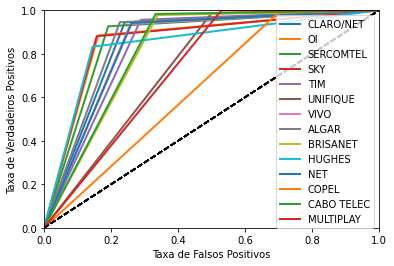

In [46]:
for i in Operadoras:
    Dados_ML = Data_Filter_2.copy()
    Dados_ML = Dados_ML[ dados["OPERADORA"] == i]
    Dados_ML.drop("OPERADORA", inplace= True, axis = 1)
    Dados_Y = Dados_ML["J1"].copy()
    Dados_X = Dados_ML.copy()
    Dados_X.drop("J1", inplace= True, axis = 1)

    X_train, X_test, y_train, y_test = train_test_split(Dados_X, Dados_Y, test_size=0.3,random_state=109) # 70% training and 30% test

    print("_______________________________________\n")
    print(i)   
    Rand_Forest_Class = RandomForestClassifier()

    Rand_Forest_Class.fit(X_train, y_train)

    y_pred = Rand_Forest_Class.predict(X_test)
    print("\n")
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    cmRF = confusion_matrix(y_test, y_pred)


    pRF = precision_score(y_test,y_pred)
    rRF = recall_score(y_test,y_pred)
    F1RF = f1_score(y_test, y_pred)
    print("Precisão:", pRF)
    print("Recall:", rRF)
    print("F1Score:", F1RF)
    fprRF, tprRF, threshold_RF = roc_curve(y_test,y_pred)
    plot_roc_curve(fprRF,tprRF, i)
    aucRF = roc_auc_score(y_test,y_pred)
    print("AUC Score:",aucRF)